# Laboratorio de Control Inteligente - Parte II

__MSc César Arturo Ángeles Ruiz__



## Programación Orientada a Agentes II

### Introducción

Recordando uno de los aspectos más importantes en inteligencia artificial, es la capacidad de desarrollar código que cumpla con los siguientes requisitos: 

- __Preciso (Buenas metricas de performance)__ 
- __Termine de ejecutar en tiempo finito (óptimo en tiempo)__
- __Pueda ser deployable en la arquitectura deseada (óptimo en memoria)__
- __Reusable__
- __Updateable__

Es por eso que es importante conocer y utilizar el paradigma correcto para su desarrollo, tomando en cuenta su implementación en __software y el hardware__ que va a ser utilizado. 

En los últimos, nuevos paradigmas han surgido tratando de cubrir todas estas necesidades de la manera más óptima y efectiva. Una de estas, y de las más utilizadas, surgen del paradigma de __Programación Orientada a Objetos__ u __OOP__. Este paradigma logra encapsular comportamiento y datos dentro de su misma memoria, de tal manera que solo el tiene el control y poder de modificarlo! (Genial cuando no queremos que algo externo cambie las variables medidas o a actuar. De la misma manera, el __Paradigma Basado en Agentes__ (o datos) __DOP__, toma la memoria como la estructura de datos central y una serie de transformadores (o transformers, yeah!) como las operaciones que peude realizar. 

En esta segunda parte de nuestro primer laboratorio, comenzaremos a utilizar conceptos de encapsulamiento y optimización de software sobre hardware. Para ello, comenzaremos conociendo la manera en que nuestro lenguaje de programación seleccionado, __Python__, maneja el concepto de encapsulamiento a través de objetos y clases. Continuaremos con el desarrollo de nuestros primeros agentes capaces de "Observar el futuro" con una dinámica definida por un modelo diferencial y terminaremos observando el tiempo y la memoria utilizada para su evolución.

El propósito de este laboratorio sigue siendo el reconocimiento del lenguaje de programación, en conjunto con un repaso de contro clásico, modelado y optimización. 

Mucha suerte y May the Force be with you! 


<img src="imgs/maytheforce.jpg" alt="Drawing" style="width: 150px;"/>


## Encapsulamiento

Como muchos ya sabrán, y hemos platicado, __Python__ es un lenguaje multiparadigma enfocado principalmente en su implementación con objetos. Recordemos que el concepto principal de un agente es que se representa como una entidad cerrada con estados internos, sensores, perceptores, memoria y actuadores. 

__Los estados internos__ solo pueden evolucionar de acuerdo al deseo del agente a través de la percepción con el ambiente. Esta __percepción__ es reconocida o transferida a partir de sus __sensores y/o perceptores__, los cuales generan una excitación o aprendizaje que es almacenado o fetcheada de su __memoria__. Al final decidiendo si actuar o no de regreso al mismo ambiente a través de sus __actuadores__.

<img src="imgs/agent.png" alt="Drawing" style="width: 500px;"/>


### Clases en Python 


El encapsulamiento de estos agentes serán definidos a través de objetos instanciados a través de clases. 
En __Python__ una clase define la estructura interna que un objeto va a obtener una vez que es inicializado o instanciado para su utilización. Es como el __blueprint o esquema__ de todos los objetos que esa clase genera. 

<img src="imgs/blueprint.jpg" alt="Drawing" style="width: 150px;"/>

Para declarar una nueva clase, python requiere que indiques el inicio de la definición a través del keyword __class < class_name >__. e.g.


```python
class agent:
    
    class_name = 'Agent'
    mood = 'Happy'
    
    ...
```

En contraste de la programación imperativa, cuando hablamos de clases, hablamos de entidades operacionales que conjuntan operaciones y estados en si mismas. Es decir, cada clase tiene variables internas que almacenan estados propios de la clase que todas instancias son capaces de ver, conocidas como __class variables__ o variables de clase. Además de estas, cada objeto de una clase también cuenta con variables que son propias de cada objeto derivado de esta clase. Estas son comunmente referidas como __instance variables__ o variables de instancia, y cada objeto tendrá una propia. Por último, cada clase es capaz de ejecutar comportamientos para cambiar de estado y para comunicarse con otros objetos. Para ello utilizan __métodos__ o funciones con parámetros y valores de retorno como los utilizados comunmente:

En resúmen, el encapsulamiento de __Python__ se basa en: 

- Generar el blueprint o estructura que los objetos tendrán a partir de su definición de __clases__.
- Utilización de variables propias de las __clases__ que son comunes entre ellas. (pueden usarse para comunicación! 🙌🏻)
- Variables internas propias que generan individualidad de clases en cada __instancia__.
- Métodos utilizados para el cambio de estado o comunicación con otros objetos.



### Métodos y variables de clase



En __Python__, los __métodos y variables de clase__ contienen como primer argumento la palabra __self__. Esto indica al interprete de python, que la variable a acceder se encuentra dentro de la memoria del objeto (en el caso de variables). Si se encuentra en la definición del método, entonces pasa como primer argumento una referencia a una instancia de la clase:

El __método__ más importante en cualquier paradigma de objetos es el método de inicialización o __constructor__. Este método se llama cada vez para generar un nuevo objeto y está encargado tanto de la alocación de memoria, como la inicialización de variables de instancia y otros métodos. 


Por ejemplo, el blueprint de un agente sencillo y feliz, juntando todos los conceptos superiores serîa:

E.g

```python
class SAgent: # Class definition 
    """Class SAgent
    
        The class Agent stores the behaviour and methods of silly agents
        
        Parameters:
        -----------
        
            Public:
                class_name String:
                        String name of the class
                mood String:
                        All of our agents have the same brain
                        
            Private:
                name String:
                    Individual Agent name (Could be Pedro for example)
                state String:
                    Performing action
                    
        Methods:
        --------
            
            SAgent(name):
                Constructor
            
            say_my_name():
                What is my name?
                
            what_you_doin():
                What would you be up for?
                    
    
    """
    
    
    class_name = 'Silly Agent' # Class variable 
    mood = 'Happy'
    
    
    def __init__(self, name): # Class initialisation method
        self.name = name # Instance variable
        self.state = 'sleeping'
    
    def say_my_name(self):
        print('my name is: '+self.name)
        
    def what_you_doin(self):
        print(self.action)
```



## Reto I

En este reto generaremos agentes capaces de predecir o evolucionar funciones en el tiempo a través del método visto en clase. Para ello requerimos que se genere el desarrollo de la primer clase de agente computacional, un __AgentePredictor__ de segundo orden. 

Genera una clase que sea (un agente mas productivo que el anterior) un __AgentePredictor__ que tenga como variables internas:

    - Nombre de clase
    - Nombre de agente o fenómeno
    - Coefficientes de funcion de transferencia en forma de espacio de estados
    - Vector temporal
    - Vector de evolución

Tambien de incluir los métodos de inicialización:

    - Constructor
    - Inicialización nombres de agente y fenómeno
    - Inicialización de su Dinámica
    - Inicialización de vectores de tiempo 
    - Método de evolución en el tiempo
    
    
Pruébalo con la siguiente función de transferencia!




In [3]:
#Importacion de metodos,librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from DynamicSystem import euler_method
from DynamicSystem import signal_plot

In [4]:
def wrapper(*params):
    """
    Returns a second order state matrix F(X,T,U) function set with the form:
    
                        .    
                        X = F(X,T,U)
                        .
                        X = A X + B U
    
    Parameters:
    -----------
        
        x : ndarray of shape (n_points)
            Dependent sampled state variable 
        t : ndarray of shape (n_points)
            Independent sampled evoluton variable
            
        params : n_tuple
            {a0, a1, b0, in_func}
                a0 : float
                    y' coefficient of dynamic system
                a1 : float
                    y coefficient of dynamic system
                b0 : float
                    x coefficient of dynamic system
                in_func : callable
                    independent forced function. Should be of the form
                    fun(t, d_t)
    
    """
    
    a0, a1, b0, in_fun = params
    
    def state_matrix(t, x, d_t):
        
        Ad = np.array([[ -a0, -a1],
                       [ 1  ,  0 ]])
        B = np.array([b0, 0])
    
        return np.matmul(Ad, x) + B * in_fun(t, d_t)
        
    return state_matrix

In [5]:
#Funcion de midpoint euler
def modified_euler(t, f_y_t, Vin):
    y = [[0,0]] #Condiciones iniciales
    dt = t[1] - t[0] #Diferencia entre puntos de tiempo
    dth = dt/2
    i = 0
    
    for time in t:
        th = time + dth
        yh = y[i] + dth*f_y_t(time,y[i],dt) 
        y.append(dt*(f_y_t(th,yh,dt)) + y[i]) 
        i = i + 1
    return np.array(y)
    

In [6]:
##### Tu código aqui!!!
class Agente:
    
    class_name = 'Seb'
    
    #Inicializacion de la clase
    '''Argumentos
    
        name: String
                Nombre del Agente
        a0 : float
                 y' coefficient of dynamic system
        a1 : float
                 y coefficient of dynamic system
        b0 : float
                 x coefficient of dynamic system
        tmax : float
                 tiempo máximo al cual queremos predecir
        tam : float
                 # de puntos entre 0 y tmax
    
    '''
    
    def __init__(self,name,a0,a1,b0,tmax,tam): 
        self.t_e = np.linspace(0,tmax,tam) #Vector de tiempo para metodo de euler
        self.nombre(name) #Nombre del Agente
        self.trans_func(a0,a1,b0) #Obtención de los coeficientes de estados
        self.vectores() #Creacion de vectores a utilizar
        self.ss = wrapper(self.A1, self.A0, self.B0, lambda x, d_t: 1) #Creacion y definicion del wrapper de espacio de estados
        self.vect_euler = euler_method(self.t_e, self.ss, self.vect_euler, lambda x, d_t: 1) #Obtencion de prediccion a traves del metodo de euler
    
    def nombre(self,name):
        self.name = name
    
    def trans_func(self,a0,a1,b0):
        self.A0 = a0
        self.A1 = a1
        self.B0 = b0
        self.ss = []
    
    def vectores(self):
        self.vect_temp = []   
        self.vect_evol = []
        self.vect_euler = [0,0]
        self.vect_mid_euler = []

## Evolucionador

Una vez que hayas generado la clase! Es momento de generar el método de evolción en el tiempo. 
Recuerda, según lo visto en clase, requerimos de la representación en espacio de estados en phases para poder extraer a información numericamente!

Define los siguientes métodos y evoluciona el sistema:

    - Plotter (despliegue la evolución en tiempo si es que existe)
    - System_error (compara el error de la evolución del agente y otra externa)
    - root_locus (despliegue los polos y ceros del sistema)
    


In [10]:
def plotter(vector1,vector2,vector3,label1,label2,label3,tmax,tam):
    '''
    Funcion que va a plottear el vector1,vector2 y vector3 conforme al vector de tiempo de 0 a tmax, con tam puntos
    
    Parameters:
    -----------
            vector1 : np.array([y1,y2,.....,yn])
                Vector a ser ploteado
            
            vector2 : np.array([z1,z2,.....,yn])
                Vector a ser ploteado
            
            vector3 : np.array([x1,x2,.....,xn])
                Vector a ser ploteado
            
            label1 : String
                Texto que a aparecer para el vector1 en la leyenda del plot
            
            label2 : String
                Texto que a aparecer para el vector2 en la leyenda del plot
            
            label2 : String
                Texto que a aparecer para el vector3 en la leyenda del plot
    
            tmax : float
                tiempo máximo al cual queremos predecir
            
            tam : float
                # de puntos entre 0 y tmax
    
    Returns:
    --------
        plot de vector1, vector2 y vector 3
    
    
'''
    t2 = np.linspace(0,tmax,tam)
    plt.figure(figsize=(10,7))
    plt.plot(t2,vector1[:tam],label=label1)
    plt.plot(t2,vector2[:tam],label=label2)
    plt.plot(t2,vector3[:tam],label=label3)
    plt.grid()
    plt.legend()
    
    
def System_error(y1,y2):
    '''
    Función que va a calcular el error entre dos vectores de misma longitud
    Parameters:
    -----------
           y1 : np.array([y1,y2,.....,yn])
                Vector de resultado de algun metodo de prediccion
    
           y2 : np.array([z1,z2,.....,zn])
                Vector de resultado de algun metodo de prediccion
        
    Returns:
    --------
       ndarray: 
            Vector de error, de len(y1)
 '''
    Error = []
    i = 0
    for j in y2:
        error = y2[i] - y1[i]
        if(error < 0):
            error = error*-1
        i = i+1
        Error.append(error)
    return np.array(Error)

def root_locus(a0,a1,b0,orden_den,orden_num):
    
    if(orden_den == 2):
        p = np.array([1,a1,a0])
    if(orden_num == 1):
        z = np.array([b0,0])
    if(orden_num == 0):
        z = np.array([0,b0])
        print('No hay ceros')
    zeros = np.roots(z)
    polos = np.roots(p)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(polos.real, polos.imag, s=10, c='b', marker="s", label='polos')
    ax1.scatter(zeros.real,zeros.imag, s=10, c='r', marker="o", label='ceros')
    plt.legend(loc='upper right');
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y[j]')
    plt.show()
    return print('Los polos del sistemas son:',polos,'y los ceros son:',zeros)

In [11]:
#Creacion primer agente
R = 10
L = 0.01
C = 0.0000039
a0 = 1.0/(L*C)
a1 = R/L
b0 = 1.0/L
tmax1 = 1
tam1 = 40
Sebas = Agente('Seb',a0,a1,b0,tmax1,tam1)

(2, 41)


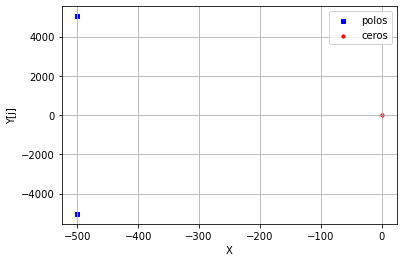

Los polos del sistemas son: [-500.+5038.95084725j -500.-5038.95084725j] y los ceros son: [0.]


In [12]:
root_locus(Sebas.A0,Sebas.A1,Sebas.B0,2,1) #Obtencion de raices, a traves del agente

## Setters

Como pudiste observar, muchas veces hay funciones que incluyen definiciones o variables de instancia que parecen crearse cada vez que la función es utilizada. Python permite, a través de su interprete y objetos settear valores que serán constantes. Estos son conocidos como setters y funcionan de la siguiente manera:

Una funcion auxiliar o __wrapper__, recibe los parámetros a definir y los settea dentro de la definición de otra función. Una vez realizada la operación, la función wrapper regresa como __objeto__ la función con el nuevo comportamiento ya definido! La función wrapper puede recibir tanto como los __setter parameters__ como los parámetros que la función generada vaya a recibir posteriormente.


E.g.


```python
def wrapper(*params):
    """
    Returns a second order state matrix F(X,T,U) function set with the form:
    
                        .    
                        X = F(X,T,U)
                        .
                        X = A X + B U
    
    Parameters:
    -----------
        
        x : ndarray of shape (n_points)
            Dependent sampled state variable 
        t : ndarray of shape (n_points)
            Independent sampled evoluton variable
            
        params : n_tuple
            {a0, a1, b0, in_func}
                a0 : float
                    y' coefficient of dynamic system
                a1 : float
                    y coefficient of dynamic system
                b0 : float
                    x coefficient of dynamic system
                in_func : callable
                    independent forced function. Should be of the form
                    fun(t, d_t)
    
    """
    
    a0, a1, b0, in_fun = params
    
    def state_matrix(x, t, d_t):
        
        Ad = np.array([[ -a0, -a1],
                       [ 1  ,  0 ]])
        B = np.array([b0, 0])
        
            return np.matmul(Ad, x) + B * in_fun(t, d_t)
        
    return state_matrix
    
        
    
    
```


## Método de predicción de Euler

Uno de los métodos de predicción en tiempo, es el método de Euler. Este método es utilizado cuando se tiene una idea de la dinámica del sistema pero la evolución no cuenta con solución analítica. 

Comenzó como un método de númerico sencillo pero ha evolucionado para ser un método de predicción de series de tiempo y aprendizaje computacional. 

E.g.

Las siguientes lineas de código representan la evolución de un sistema dinámico de segundo orden utilizando el método de Euler.



$$H(S) = \frac{400}{S^2 + 16S + 400}$$


La respuesta al escalón es computada en las siguientes celdas.



(2, 41)


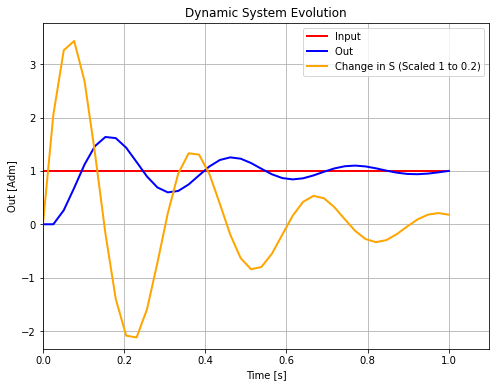

In [8]:
# Implementación de la evolución en tiempo de la matriz de estados de circuito I a función Escalón
t_e = np.linspace(0, 1, 40)
y0_e = [0, 0]
state_matrix_e = wrapper(16, 400, 400, lambda x, d_t: 1) 
y_e = euler_method(t_e, state_matrix_e, y0_e, lambda x, d_t: 1)
signal_plot(t_e,y_e, figsize = [8,6], vin = lambda x: np.array([1]*len(t_e)))

### Precisión de la solución

Implementa la versión extendida del método de Euler y compara el error de las señales. Utiliza la clase Agente para evolucionar el sistema internamente del agente.
Compara las señales con los mismos vectores de tiempo y frequencia de sampling. 

In [9]:
a1 = 16
a0 = 400
b0 = 400
tmax3 = 1
tam3 = 500 #Tiempo de error minimo entre  metodo de euler y mid euler
Ejercicio = Agente('Ejercicio',a0,a1,b0,tmax=tmax3,tam=tam3) #Creacion de agente

(2, 501)


No hay ceros


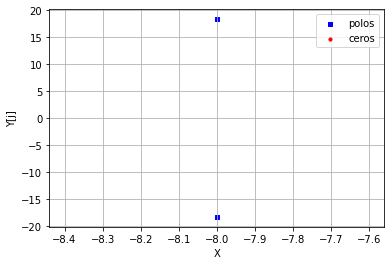

Los polos del sistemas son: [-8.+18.33030278j -8.-18.33030278j] y los ceros son: []


In [10]:
root_locus(Ejercicio.A0,Ejercicio.A1,Ejercicio.B0,2,0) #Obtencion de polos y ceros del sistema

In [11]:
Ejercicio.vect_mid_euler = modified_euler(Ejercicio.t_e,Ejercicio.ss,lambda x,d_t:1) #Obtencion del vector de evolucion a traves del metodo midpoint euler  
Ejercicio.vect_temp = System_error(Ejercicio.vect_mid_euler[:,1],Ejercicio.vect_euler[1,:]) #Obtencion del error entre el metodo de euler y midpoint euler

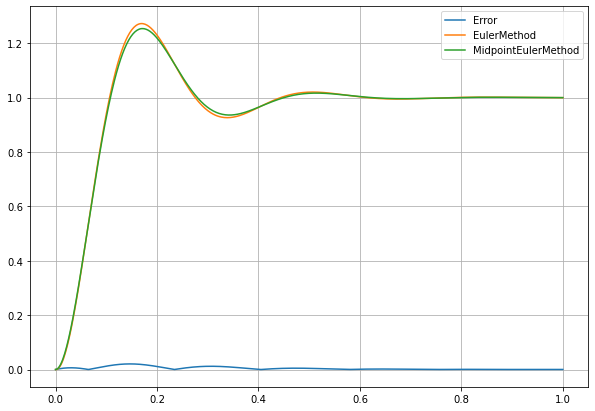

In [12]:
plotter(Ejercicio.vect_temp,Ejercicio.vect_euler[1,:],Ejercicio.vect_mid_euler[:,1],'Error','EulerMethod','MidpointEulerMethod',tmax3,tam3)

In [13]:
from DynamicSystem import time_complexity
from time import time

profiling_processes = 1
mean_time = 0

for n in range(profiling_processes):
    with time_complexity('Euler Method Evolution', profiling_processes) as val:
        t_e = np.linspace(0, 1, 500)
        y0_e = [0, 0]
        state_matrix_e = wrapper(16, 400, 400, lambda x, d_t: 1) 
        y_e = euler_method(t_e, state_matrix_e, y0_e, lambda x, d_t: 1)
        mean_time += -(val-time())/profiling_processes

print('\n\nCode mean time: ' +str(mean_time)+ 's')

(2, 501)
Process name : <Euler Method Evolution> Execution Time: 0.03897714614868164time units


Code mean time: 0.03897714614868164s


In [14]:
'''Se está tomando el tiempo que toma llevar a cabo el metodo Midpoint Euler'''
profiling_processes = 1
mean_time = 0

"""Code to time profile"""

for n in range(profiling_processes):
    with time_complexity('Midpoint Euler Method Evolution', profiling_processes) as val:
        t_me = np.linspace(0, 1, 500)
        state_matrix_me = wrapper(16, 400, 400, lambda x, d_t: 1) 
        y_me = modified_euler(t_me,state_matrix_me,lambda x,d_t:1)
        mean_time += -(val-time())/profiling_processes
        
print('\n\nCode mean time: ' +str(mean_time)+ 's')

Process name : <Midpoint Euler Method Evolution> Execution Time: 0.05896592140197754time units


Code mean time: 0.05896592140197754s


## Midiendo tiempo de Ejecución 2

La otra manera de medir tiempo es a través de un line profiler, el cual analiza linea por linea el tiempo que el código ha tardado. A continuación se presenta como se realizará.

Nota: En caso de que sea la primera vez utilizando el método, ejecuta la siguiente linea de código en una celda aparte:
``` Python 
!pip install cython
!pip install git+https://github.com/rkern/line_profiler
```

In [15]:
#!pip install git+https://github.com/rkern/line_profiler

Python time line profiler

``` Python 
%load_ext line_profiler
%lprun -f euler_method euler_method(t, state_matrix, y0, lambda x, d_t: 1)
```



Compara ambos métodos con ambos profilers y responde:

- Qué método cuenta con el menor error? 
        El metodo de midpoint euler cuenta con menor error
- Qué método es el mas rápido?
        El Metodo de Euler
- Basado en tus calculos, que número de puntos son necesarios para igualar el error en ambos métodos?
        Los puntos mínimos son 500



# Reto II 

Tu equipo intenta generar el mejor control para el manejo del último auto elêctrico de tu compañia Trebsla. Para ello, ellos piensan en comenzar el modelado utilizando control clásico. Una copia del diagrama se encuentra en el siguiente esquemático:


<img src="imgs/car.png" alt="Drawing" style="width: 300px;"/>

$ A = 48 $

$ Lm = 40 mH $

$ Rm = 10 ohms $

$ WI = 15 kg $

$ Mc = 1.5 Ton $

$ K_t = 377 \frac{m}{s V}$

$ Rw = 0.64 m $



La entrada del sistema es la posición del acelerador con respecto al piso del automovil. La salida es la velocidad tangencial del Trebsla. Tu misión es la siguiente:

- Utilizando un agente, calcula la matriz de estados de la aceleración y la velocidad del auto
- Evoluciona el sistema a presionar el pedal a una velocidad definida. 
- Utiliza ambos métodos con 100 puntos cada uno usando el método de Euler y Euler extendido.
- Analiza el tiempo de predicción de cada uno de los métodos!
- Que control utilizarias para reducir su tiempo de establecimiento sin causar oscilaciones?



In [75]:
a0 = 5269.7
a1 = 250
b0 = 429.3
tmax4 = 1
tam4 = 125
Reto2 = Agente('Reto',a0,a1,b0,tmax4,tam4)

(2, 126)


In [76]:
Reto2.vect_mid_euler = modified_euler(Reto2.t_e,Reto2.ss,lambda x,d_t:1)
Reto2.vect_temp = System_error(Reto2.vect_mid_euler[:,1],Reto2.vect_euler[1,:])

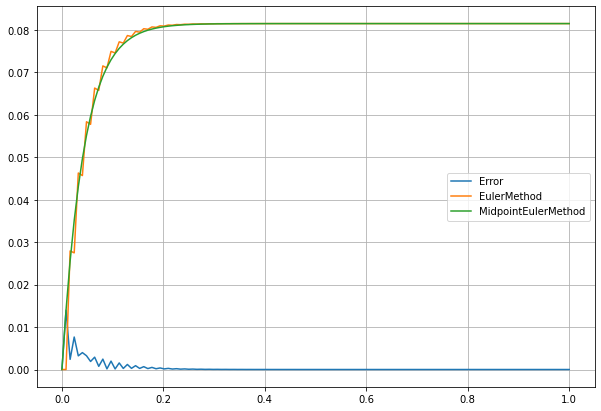

In [77]:
plotter(Reto2.vect_temp,Reto2.vect_euler[1,:],Reto2.vect_mid_euler[:,1],'Error','EulerMethod','MidpointEulerMethod',tmax4,tam4)